# Building a Linear Regression Model
This notebook builds a linear regression model to predict the fuel efficiency (MPG) of automobiles using the Auto MPG dataset. This dataset contains features such as cylinders, displacement, horsepower, weight, acceleration, model year, and origin. The Auto MPG dataset is available at https://archive.ics.uci.edu/ml/datasets/auto+mpg.

The notebook serves as a resource for begineers who want to dive into the world of predictive modelling using linear regression.

## Import Libraries
Import needed Python libraries.

Below is a description of some of the libraries used.
* Matplotlib is a Python library for creeating data visualizations.
* Pandas is a Python library that is used for daata manipulation and analysis.
* Scikit-Learn is a popular machine learning library in Python that provides simple ways to implement vaious machine learning algorithms, e.g, regresssion.
* Seaborb is a data visualization Python library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Data Collection
Read the Auto MPG dataset into a DataFrame.

In [2]:
dataset_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(dataset_url,
                 names=column_names,
                 na_values='?',
                 comment='\t',
                 sep=' ',
                 quotechar='"',
                 skipinitialspace=True)

## Data Preprocessing

### Exploratory Data Analysis
Learn about the Auto MPG dataset.

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.shape

(398, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
# Get descriptive statistics for the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Encoding

In [7]:
# Columns that contain categoical data
categorical_cols = ['Model Year', 'Origin']

In [8]:
# Encode the categorical features
enc = OneHotEncoder(categories='auto', handle_unknown='ignore')
enc_data = enc.fit_transform(df[categorical_cols]).toarray()
enc_cols = enc.get_feature_names_out(categorical_cols)
enc_df = pd.DataFrame(enc_data, columns=enc_cols)

In [9]:
df = df.join(enc_df)
df.drop(columns=categorical_cols, axis=1, inplace=True)

In [10]:
# Standardize features due to diverse range of values.
df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']] = StandardScaler().fit_transform(df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']])
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year_70,Model Year_71,Model Year_72,Model Year_73,...,Model Year_76,Model Year_77,Model Year_78,Model Year_79,Model Year_80,Model Year_81,Model Year_82,Origin_1,Origin_2,Origin_3
0,18.0,1.498191,1.090604,0.664133,0.630870,-1.295498,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15.0,1.498191,1.503514,1.574594,0.854333,-1.477038,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18.0,1.498191,1.196232,1.184397,0.550470,-1.658577,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16.0,1.498191,1.061796,1.184397,0.546923,-1.295498,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,17.0,1.498191,1.042591,0.924265,0.565841,-1.840117,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.480448,-0.213324,0.011586,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
394,44.0,-0.856321,-0.925936,-1.364896,-0.993671,3.279296,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
395,32.0,-0.856321,-0.561039,-0.532474,-0.798585,-1.440730,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
396,28.0,-0.856321,-0.705077,-0.662540,-0.408411,1.100822,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Clean Data

In [11]:
# Check for missing values
df.isna().sum()

MPG              0
Cylinders        0
Displacement     0
Horsepower       6
Weight           0
Acceleration     0
Model Year_70    0
Model Year_71    0
Model Year_72    0
Model Year_73    0
Model Year_74    0
Model Year_75    0
Model Year_76    0
Model Year_77    0
Model Year_78    0
Model Year_79    0
Model Year_80    0
Model Year_81    0
Model Year_82    0
Origin_1         0
Origin_2         0
Origin_3         0
dtype: int64

In [12]:
# For simplicity, drop rows with unknown values.
df = df.dropna()

In [13]:
df.shape

(392, 22)

### Visuaize data relationship

## Feature Engineering

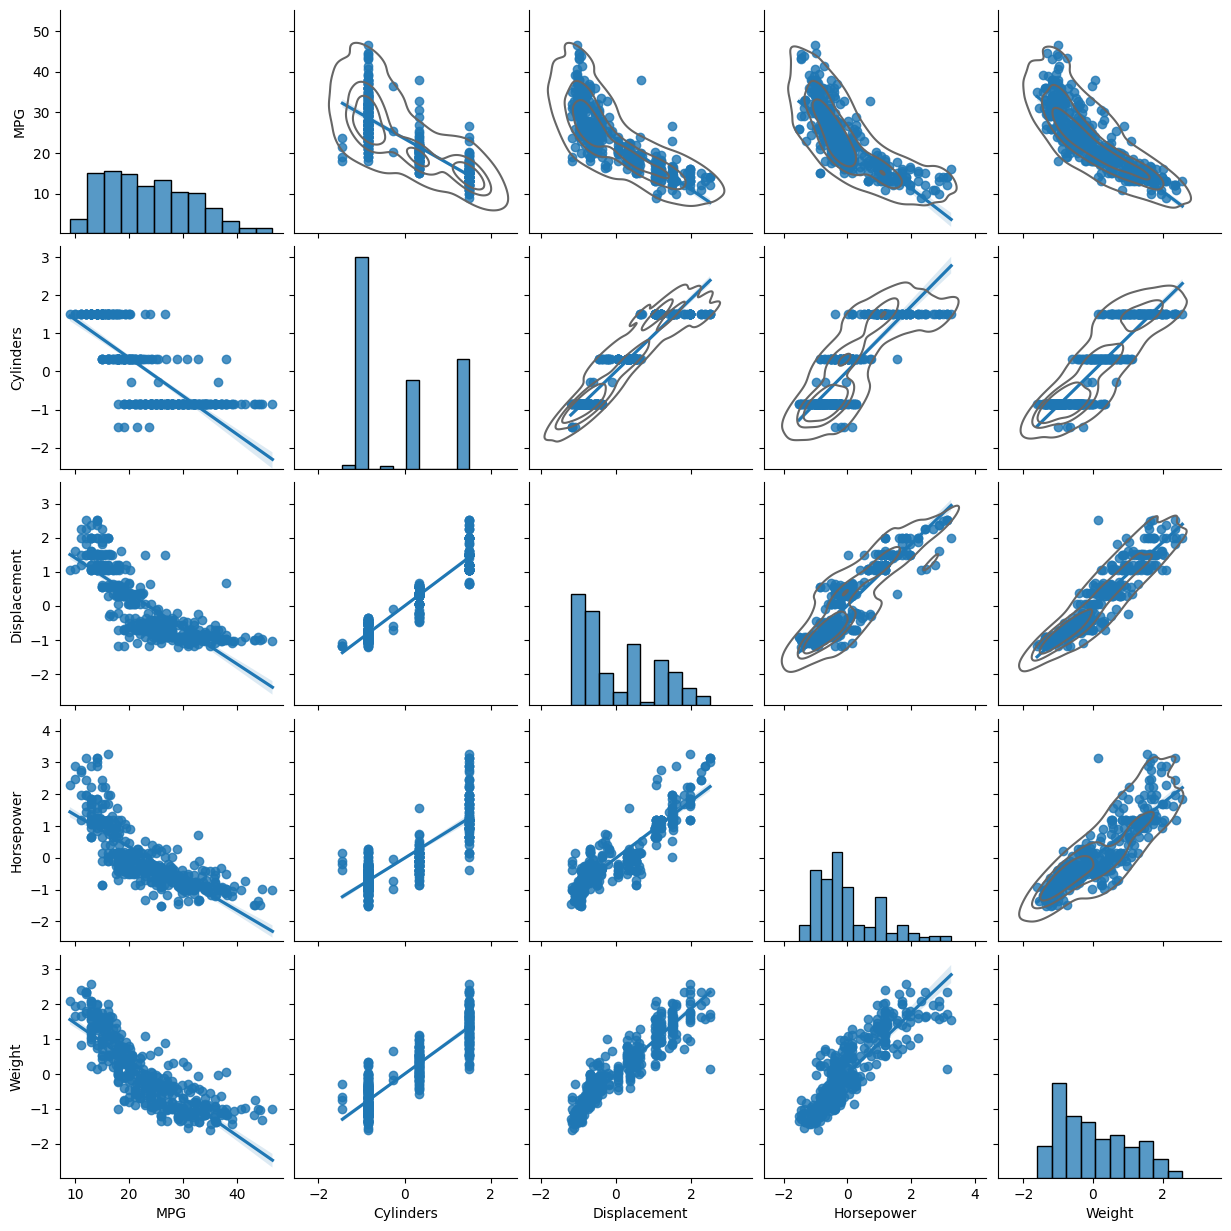

In [14]:
# Pairplots for all the features in the dataset and visualize the distribution of observations
g = sns.pairplot(df[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']], kind= 'reg')
g.map_upper(sns.kdeplot, levels=4, color='.4')
plt.show()

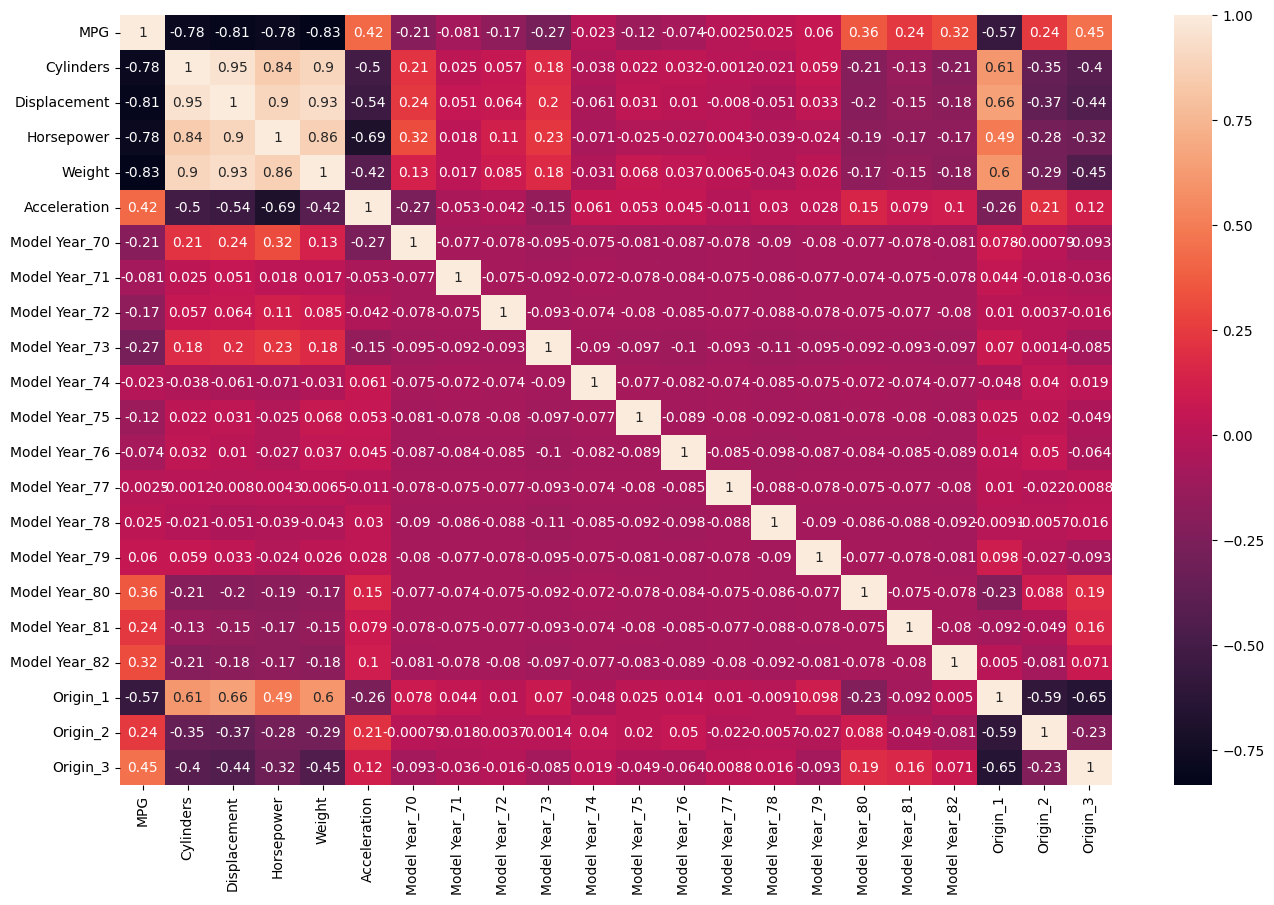

In [15]:
# Heatmap to represent the pairwise corelation between attributes in the dataset.
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
# Build features
columns = df.columns.tolist()
columns.remove('MPG')
feature_columns = columns

In [17]:
# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns],
                                                    df['MPG'],
                                                    test_size=0.25)

In [18]:
print('Training feature set: ', X_train.shape)
print('Training label set: ', y_train.shape)
print('Test feature set: ', X_test.shape)
print('Test label set: ', y_test.shape)

Training feature set:  (294, 21)
Training label set:  (294,)
Test feature set:  (98, 21)
Test label set:  (98,)


## Model Training
Build a Linear Regression model using Scikit-Learn

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
c = model.intercept_
w = model.coef_

print('Intercept of LR model: ', c)
print('Coefficient of LR model: ', w)

Intercept of LR model:  24.311683797027424
Coefficient of LR model:  [-0.34749045  1.77592929 -0.84624513 -5.30209343  0.24911242 -3.10718555
 -2.19212582 -3.1309937  -3.89194955 -1.63832354 -2.35367695 -1.81410442
 -0.06086675 -0.1247982   2.50287076  7.05974954  3.53698015  5.21442403
 -1.57571822  0.8179438   0.75777442]


## Model Evaluation

In [21]:
# Use the model to predict the MPG for the test dataset.
y_prediction = model.predict(X_test)

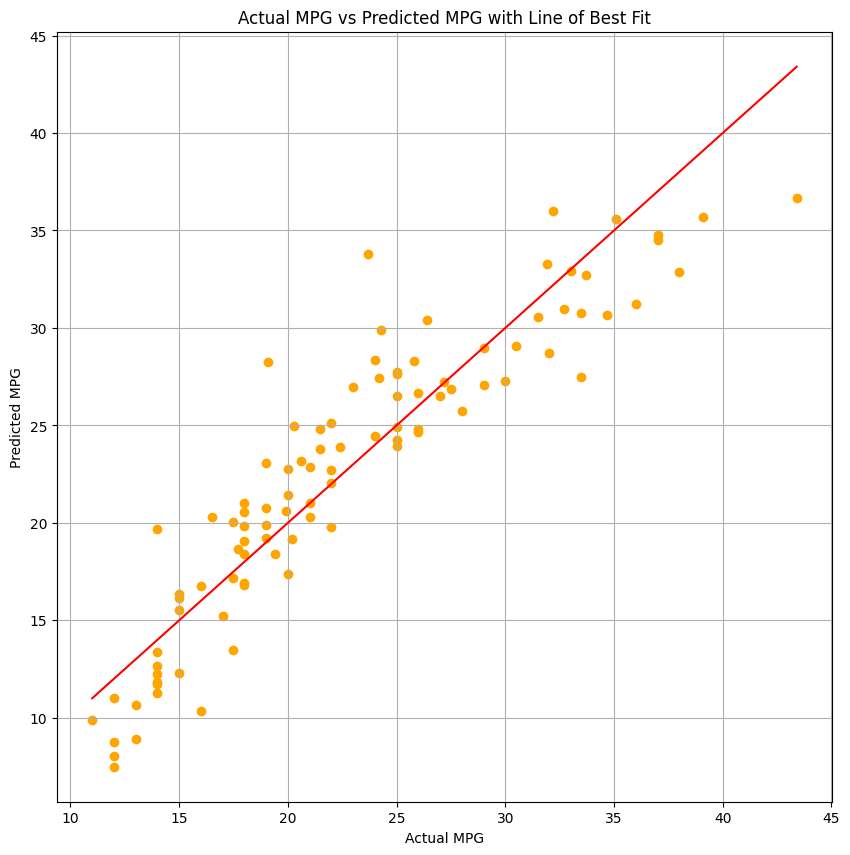

In [22]:
# Evaluate the predicted MPG against the actual MPG to determine how the model performs.
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_prediction, color='orange', label='Actual Price vs Predicted Price')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual MPG vs Predicted MPG with Line of Best Fit')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Line of best fit')
plt.show()

In [23]:
'''
Calcuate R-squared. It is a statistical measure that describes how well a regression model
fits the data. It measures how much variation in dependent attributes is due to
the independent attributes. 1 indicates a perfect fit, 0 indicates no 'linear' relationship.
'''

r_squared_score = model.score(X_test, y_test)
print('R-squared: ', r_squared_score)

R-squared:  0.8321092374292074


In [24]:
'''
Calculate the Root Mean Square Error. It measuress how far the predicted values are from the
actual values. Lower root mean square error is better than a higher one. 0 indicates a pefect
model fit.
'''

mse = mean_squared_error(y_test, y_prediction)
root_mse = np.sqrt(mse)
print(root_mse)

2.986001888495211
